<a href="https://colab.research.google.com/github/cmlakin/Machine-Learning-Final-Project----Lakin-Corrina/blob/main/MLFP_Lakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import ResidualsPlot
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
!ls
df = pd.read_excel('/content/Nashville_housing_data_2013_2016.xlsx')
df

In [3]:
cdf = df.copy()
cdf = cdf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID','Legal Reference', 'Grade', 'Sold As Vacant'], axis=1)
cdf = cdf.drop(['Multiple Parcels Involved in Sale', 'Owner Name', 'Tax District','Neighborhood', 'image'], axis=1)
cdf = cdf.dropna()
# cdf

In [4]:
cdf = cdf.sort_values(by='Bedrooms', ascending=False)
cdf = cdf.drop(cdf.index[23970:])

# cdf

In [5]:
cdf = cdf.sort_values(by='Acreage', ascending=True)
cdf = cdf.drop(cdf.index[23900:])
# cdf

In [6]:
cdf = cdf.sort_values(by='Finished Area', ascending=True)
cdf['Finished Area'] = cdf['Finished Area'].astype(int)
cdf = cdf.drop(cdf.index[20086:])
# cdf

In [7]:
cdf = cdf.sort_values(by='Sale Price', ascending=True)
cdf = cdf.drop(cdf.index[8500:])
# cdf

In [8]:
cdf = cdf.sort_values(by='Full Bath', ascending=False)
cdf = cdf.drop(cdf.index[8497:])
# cdf

In [ ]:
cdf['Full Bath'].unique()

In [10]:
cdf['Land_Use'] = cdf['Land Use']
cdf['Foundation_Type'] = cdf['Foundation Type']
cdf['Exterior_Wall'] = cdf['Exterior Wall']

cdf = cdf.drop(['Land Use', 'Foundation Type', 'Exterior Wall'], axis=1)
cdf = cdf[cdf.Land_Use != 'CHURCH']
cdf = cdf[cdf.Land_Use != 'DAY CARE CENTER']
cdf = cdf[cdf.Land_Use != 'DORMITORY/BOARDING HOUSE']
cdf = cdf[cdf.Land_Use != 'NON-PROFIT CHARITABLE SERVICE']
cdf = cdf[cdf.Land_Use != 'OFFICE BLDG (ONE OR TWO STORIES)']
cdf = cdf[cdf.Land_Use != 'PARSONAGE']
cdf = cdf[cdf.Land_Use != 'SPLIT CLASS']
cdf = cdf[cdf.Land_Use != 'ZERO LOT LINE']
cdf = cdf[cdf.Land_Use != 'MOBILE HOME']
cdf = cdf[cdf.Land_Use != 'RESIDENTIAL COMBO/MISC']
cdf = cdf[cdf.Land_Use != 'VACANT RES LAND']
cdf = cdf[cdf.Land_Use != 'VACANT RESIDENTIAL LAND']
cdf = cdf[cdf.Land_Use != 'QUADPLEX']

cdf = cdf[cdf.Foundation_Type != 'PIERS']

cdf = cdf[cdf.Exterior_Wall != 'CONC BLK']
cdf = cdf[cdf.Exterior_Wall != 'LOG']
cdf = cdf[cdf.Exterior_Wall != 'METAL']

cdf = cdf[cdf.Bedrooms <= 6]

# cdf

In [11]:
cdf['Sale Price'] = cdf['Sale Price'].astype(float)
# cdf.dtypes

In [12]:
# 5 - Three aggregated coumns using groupby and transform
cdf['Avg_Price_By_Bedrooms'] = cdf.groupby('Bedrooms')['Sale Price'].transform('mean')
cdf['Avg_Price_By_Bedrooms'] = cdf['Avg_Price_By_Bedrooms'].astype(int)
cdf['Avg_Value_By_Bedrooms'] = cdf.groupby('Bedrooms')['Total Value'].transform('mean')
cdf['Avg_Value_By_Bedrooms'] = cdf['Avg_Value_By_Bedrooms'].astype(int)
cdf['Sales_by_city_count'] = cdf.groupby('Property City')['Land_Use'].transform('count')
# cdf

In [13]:

land_use_map = { 'SINGLE FAMILY': 1,
                 'DUPLEX': 2,
                 'TRIPLEX': 3 }

cdf = cdf.replace({'Land_Use' : land_use_map})
# cdf

In [14]:
# 4 - label-encoded, numbers associated with the type of property
le = LabelEncoder()
y_data = le.fit_transform(cdf['Total Value'])
cdf['Property_Address'] = le.fit_transform(cdf['Property Address'])
cdf['Property_City'] = le.fit_transform(cdf['Property City'])
cdf['Foundation'] = le.fit_transform(cdf['Foundation_Type'])
cdf['Exterior'] = le.fit_transform(cdf['Exterior_Wall'])
# cdf

# temp used further down for pain plot
temp = cdf.sample(n=500) 
# cdf['Property City'] = le.fit_transform(cdf['Property City'])
x_data = cdf
x_data = x_data.drop(columns=['Property Address', 'Total Value', 'Property City', 'Sale Date', 'Address', 'City',
                           'TN', 'Foundation_Type', 'Exterior_Wall'])


# Scaling
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)


# x_data_test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state=1)

model = linear_model.LinearRegression()


In [15]:
# train
model = model.fit(x_train, y_train)

# reg.score(x_test, y_test)
model.score(x_test, y_test)

0.8929448790345997

In [16]:
model.score(x_train, y_train)

0.88386214901877

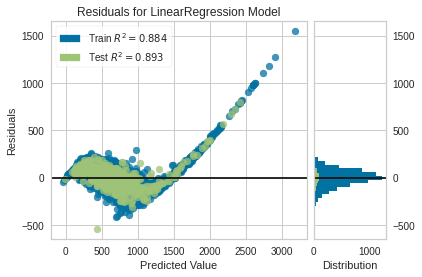

In [17]:
visual = ResidualsPlot(model)
visual.fit(x_train, y_train)
visual.score(x_test, y_test)
visual.poof()

In [19]:
cdf['Land_Use'].unique()


array([2, 3, 1])

In [21]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [22]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.02


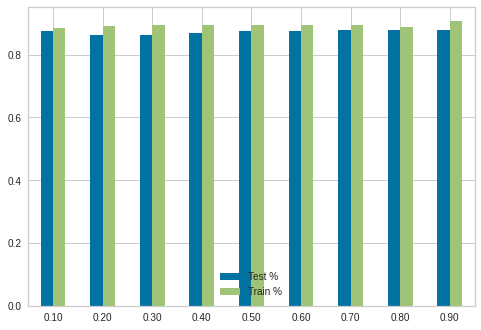

In [ ]:
test_percent = [0.874, 0.861, 0.864, 0.870, 0.874, 0.876, 0.880, 0.880, 0.878]
 
train_percent = [0.886, 0.891, 0.893, 0.894, 0.894, 0.896, 0.894, 0.889, 0.907]
 
index = ['0.10', '0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90']
 
txdf = pd.DataFrame({'Test %': test_percent,
 
                   'Train %': train_percent}, index=index)
 
ax = txdf.plot.bar(rot=0)

In [ ]:
# decision tree
clf = tree.DecisionTreeClassifier()

reg = clf

reg = reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.14190093708165996

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_predict = clf.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.008032128514056224

In [ ]:
# target = list(cdf['Property City'].unique())
temp_data = temp[:17]
feature_names = list(temp_data) 
feature_names = feature_names[:17]
# import graphviz
# dot_data = tree.export_graphviz(clf,
#                                 out_file=None, 
#                       feature_names=feature_names,  
#                       class_names=target,  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  

# graph

In [ ]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=feature_names)
print(r)

|--- Sale Price <= -0.18
|   |--- Sale Price <= -0.55
|   |   |--- Sale Price <= -0.86
|   |   |   |--- class: 161
|   |   |--- Sale Price >  -0.86
|   |   |   |--- class: 355
|   |--- Sale Price >  -0.55
|   |   |--- Sale Price <= -0.37
|   |   |   |--- class: 491
|   |   |--- Sale Price >  -0.37
|   |   |   |--- class: 560
|--- Sale Price >  -0.18
|   |--- Sale Price <= 0.15
|   |   |--- Sale Price <= -0.03
|   |   |   |--- class: 673
|   |   |--- Sale Price >  -0.03
|   |   |   |--- class: 758
|   |--- Sale Price >  0.15
|   |   |--- Sale Price <= 0.46
|   |   |   |--- class: 803
|   |   |--- Sale Price >  0.46
|   |   |   |--- class: 1073



In [ ]:
# #  pandas one hot encoding
# temp = pd.get_dummies(cdf['Property City'])
# temp

In [ ]:
#  Used to get the couns for Avg Sale Price based on number of bedrooms

# one_bed_cdf = cdf[cdf.Bedrooms == 1]
# one_bed_cdf
# two_bed_cdf = cdf[cdf.Bedrooms == 2]
# two_bed_cdf
# three_bed_cdf = cdf[cdf.Bedrooms == 3]
# three_bed_cdf
# four_bed_cdf = cdf[cdf.Bedrooms == 4]
# four_bed_cdf
# five_bed_cdf = cdf[cdf.Bedrooms == 5]
# five_bed_cdf
# six_bed_cdf = cdf[cdf.Bedrooms == 6]
# six_bed_cdf

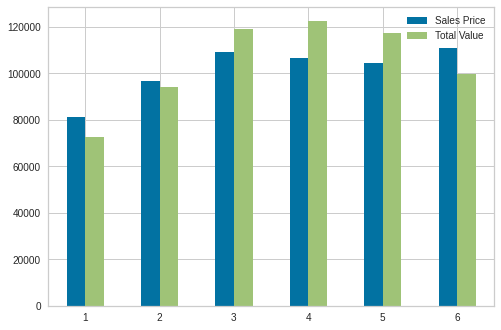

In [ ]:
sales_price_avg = [81309, 96626, 109277, 106464, 104658, 110787]
 
total_value_avg = [72579, 93957, 119155, 122495, 117163, 99624]
 
index = ['1', '2', '3', '4', '5', '6']
 
tdf = pd.DataFrame({'Sales Price': sales_price_avg,
 
                   'Total Value': total_value_avg}, index=index)
 
ax = tdf.plot.bar(rot=0)

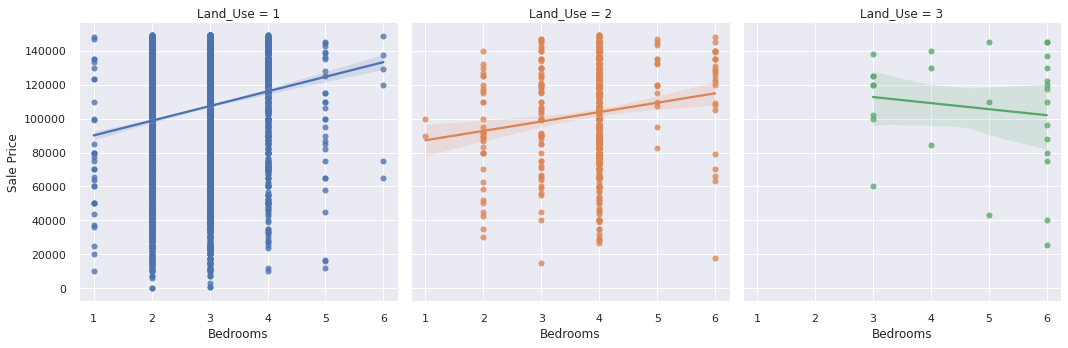

In [ ]:

sns.set(rc={'figure.figsize': (13, 9)})
sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col='Land_Use', hue='Land_Use')
# sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col = 'Property City', hue='Property City')

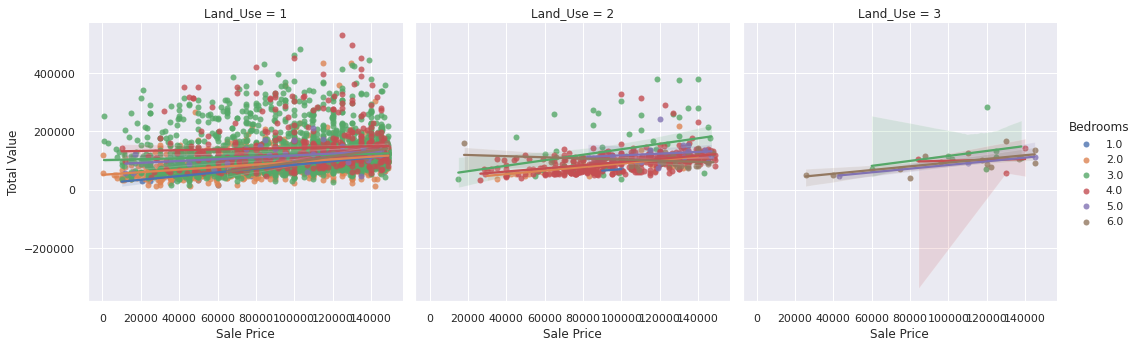

In [ ]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', col='Land_Use',  hue='Bedrooms')

In [ ]:

fig = px.scatter_3d(cdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Land_Use', size='Bedrooms', size_max= 20, 
                    symbol='Land_Use', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
tdf = cdf[cdf.Bedrooms >= 3]
tdf = tdf[tdf.Bedrooms < 6]

tdf = tdf[tdf.Exterior_Wall != 'STUCCO']
tdf = tdf[tdf.Exterior_Wall != 'STONE']
tdf = tdf[tdf.Exterior_Wall != 'FRAME/STONE']

fig = px.scatter_3d(tdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Exterior_Wall', size='Bedrooms', size_max= 10, 
                    symbol='Exterior_Wall', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

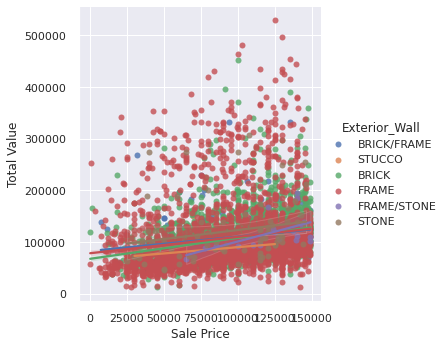

In [ ]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', hue='Exterior_Wall')

/usr/local/lib/python3.7/dist-packages/scipy/stats/kde.py:581: RuntimeWarning:

invalid value encountered in sqrt



LinAlgError: ignored

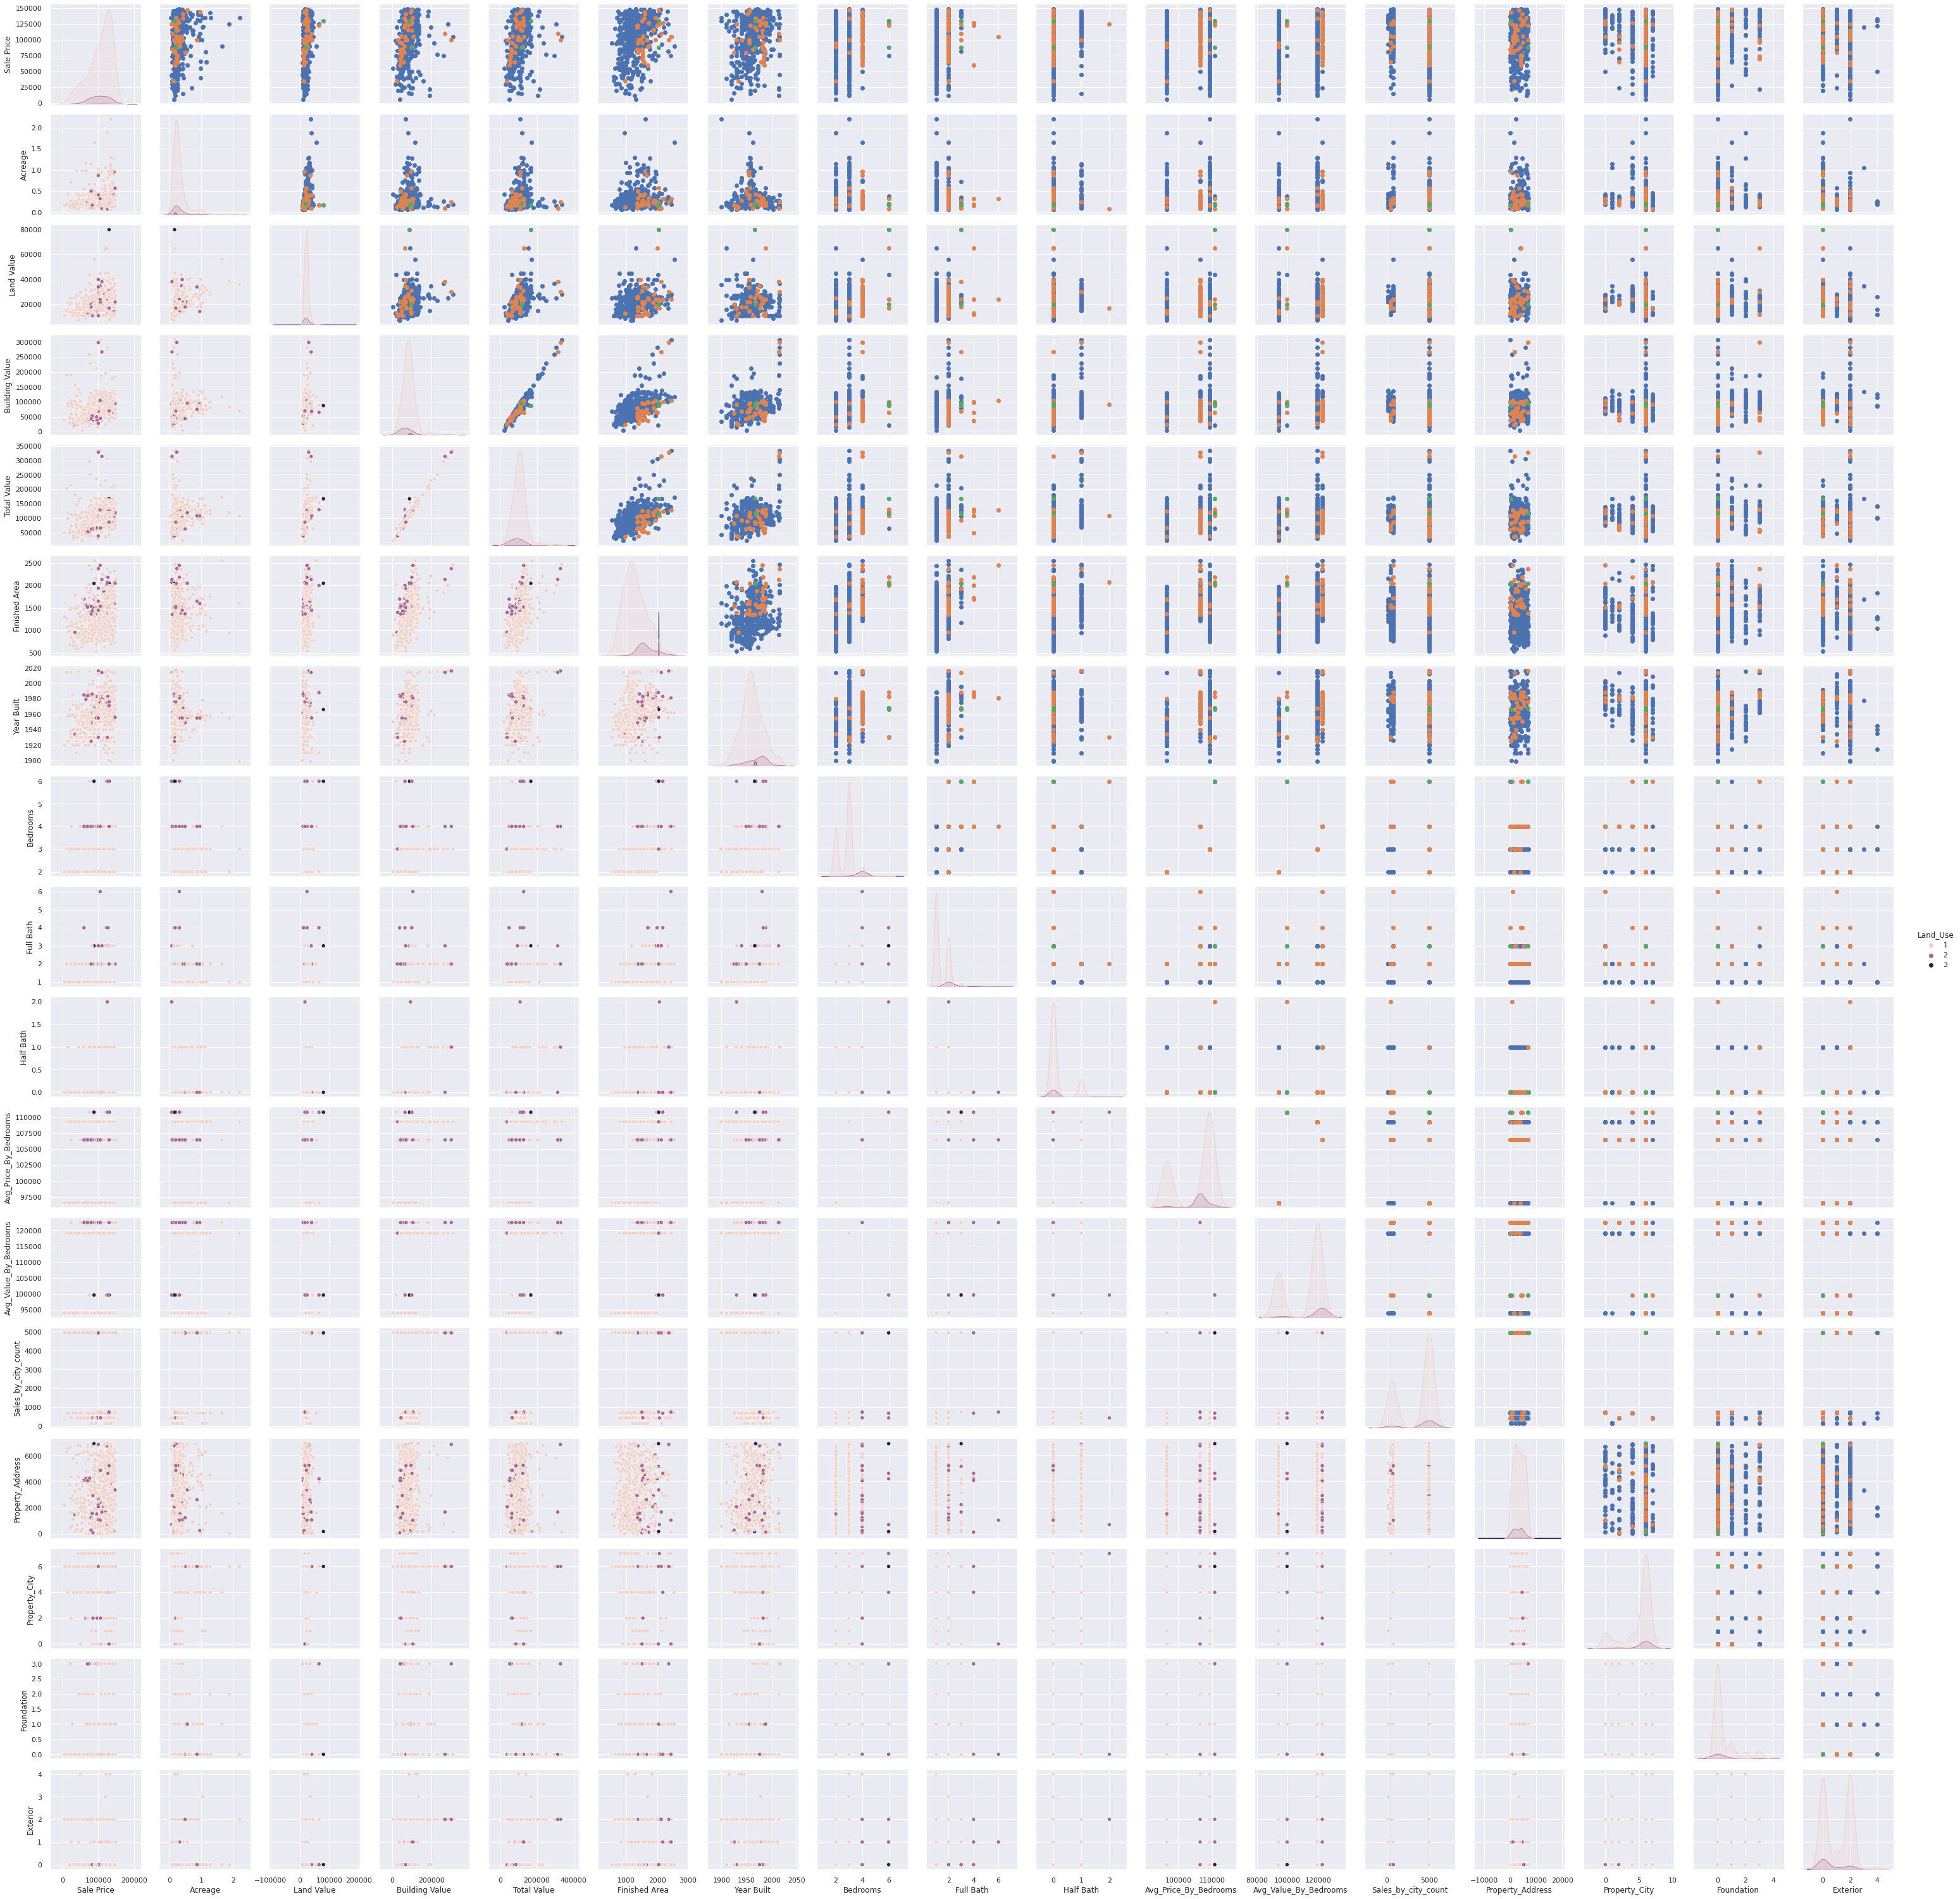

In [ ]:
plot = sns.pairplot(temp, hue='Land_Use')
plot = plot.map_upper(plt.scatter)
plot = plot.map_lower(sns.kdeplot)

'''
I'm not sure what the error is below. It still displayed the pairplot.
'''